<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-10 00:25:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  56.3MB/s    in 3.7s    

2024-12-10 00:25:11 (54.5 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


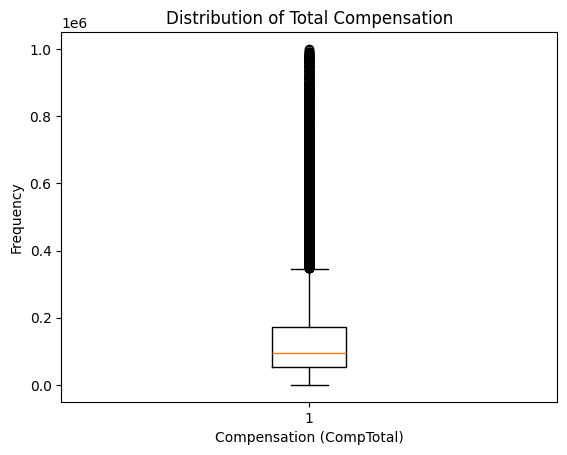

In [12]:
# your code goes here
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL AND CompTotal < 1000000;"
data = pd.read_sql_query(QUERY, conn)


plt.boxplot(data['CompTotal'])
plt.title('Distribution of Total Compensation')
plt.xlabel('Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


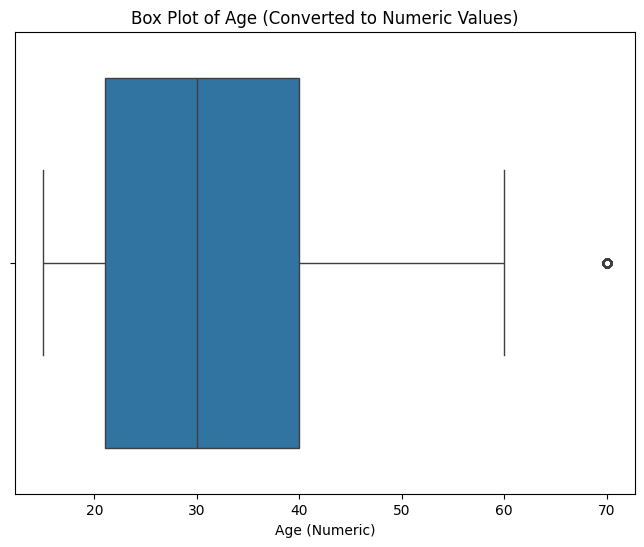

In [16]:
import seaborn as sns
query = """
SELECT Age,
    CASE 
        WHEN Age = 'Under 18 years old' THEN 15
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = '65 years or older' THEN 70
        ELSE NULL
    END AS AgeNumeric
FROM main
WHERE Age IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='AgeNumeric')
plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.xlabel('Age (Numeric)')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


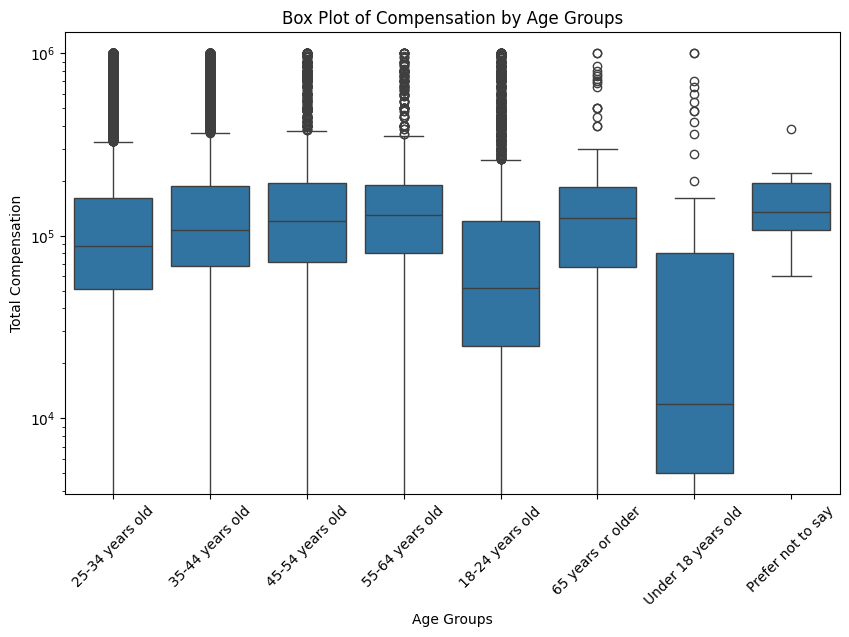

In [17]:
# your code goes here
query = """
SELECT CompTotal, Age 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Filter out extreme values (optional)
df = df[df['CompTotal'] <= 1_000_000]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='CompTotal')
plt.title('Box Plot of Compensation by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Total Compensation')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


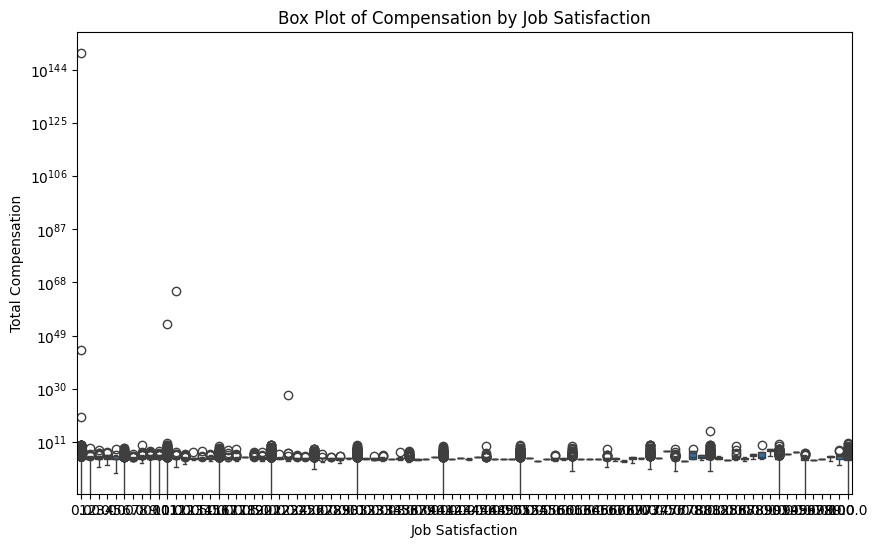

In [20]:
# your code goes here
query = """
SELECT CompTotal, JobSatPoints_6
FROM main 
WHERE CompTotal IS NOT NULL AND CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatPoints_6', y='CompTotal')
plt.title('Box Plot of Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Total Compensation')
plt.yscale('log')
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [21]:
# your code goes here
query = """
SELECT ConvertedCompYearly, DeveloperType
FROM main 
WHERE ConvertedCompYearly IS NOT NULL AND DeveloperType IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Filter for top 5 developer types
top_developers = df['DeveloperType'].value_counts().head(5).index
df = df[df['DeveloperType'].isin(top_developers)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='DeveloperType', y='ConvertedCompYearly')
plt.title('Box Plot of Compensation by Top 5 Developer Types')
plt.xlabel('Developer Types')
plt.ylabel('Yearly Compensation')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


DatabaseError: Execution failed on sql '
SELECT ConvertedCompYearly, DeveloperType
FROM main 
WHERE ConvertedCompYearly IS NOT NULL AND DeveloperType IS NOT NULL;
': no such column: DeveloperType

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


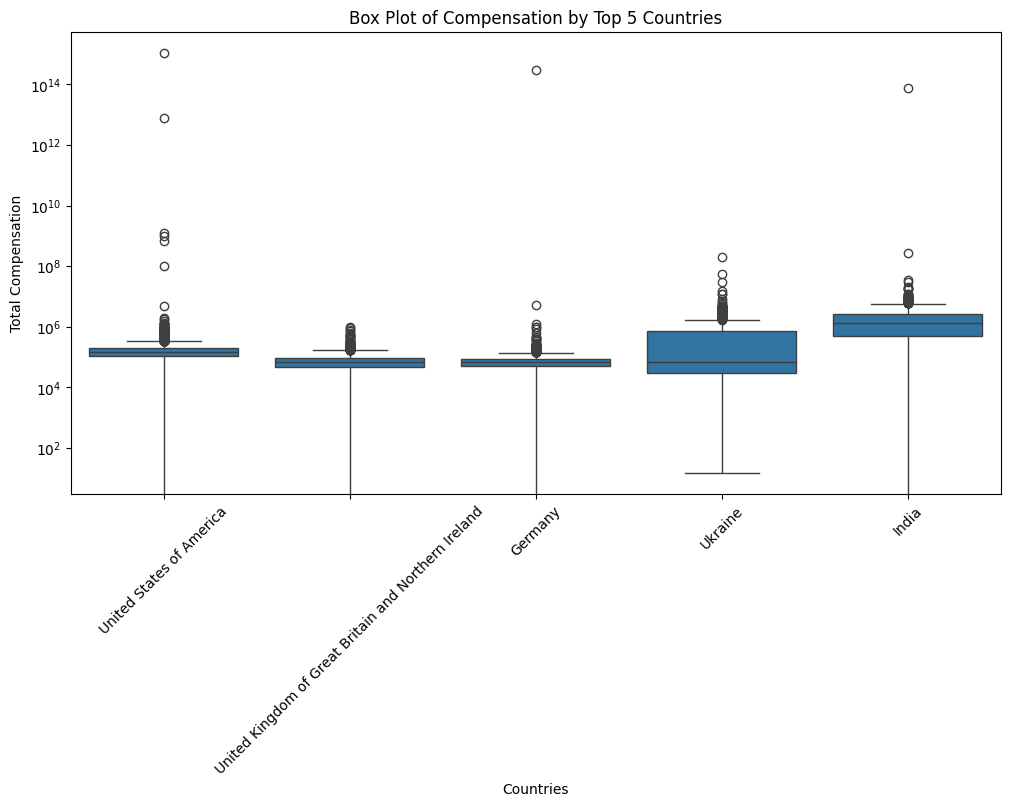

In [22]:
# your code goes here
query = """
SELECT CompTotal, Country 
FROM main 
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Filter for top 5 countries
top_countries = df['Country'].value_counts().head(5).index
df = df[df['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='CompTotal')
plt.title('Box Plot of Compensation by Top 5 Countries')
plt.xlabel('Countries')
plt.ylabel('Total Compensation')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


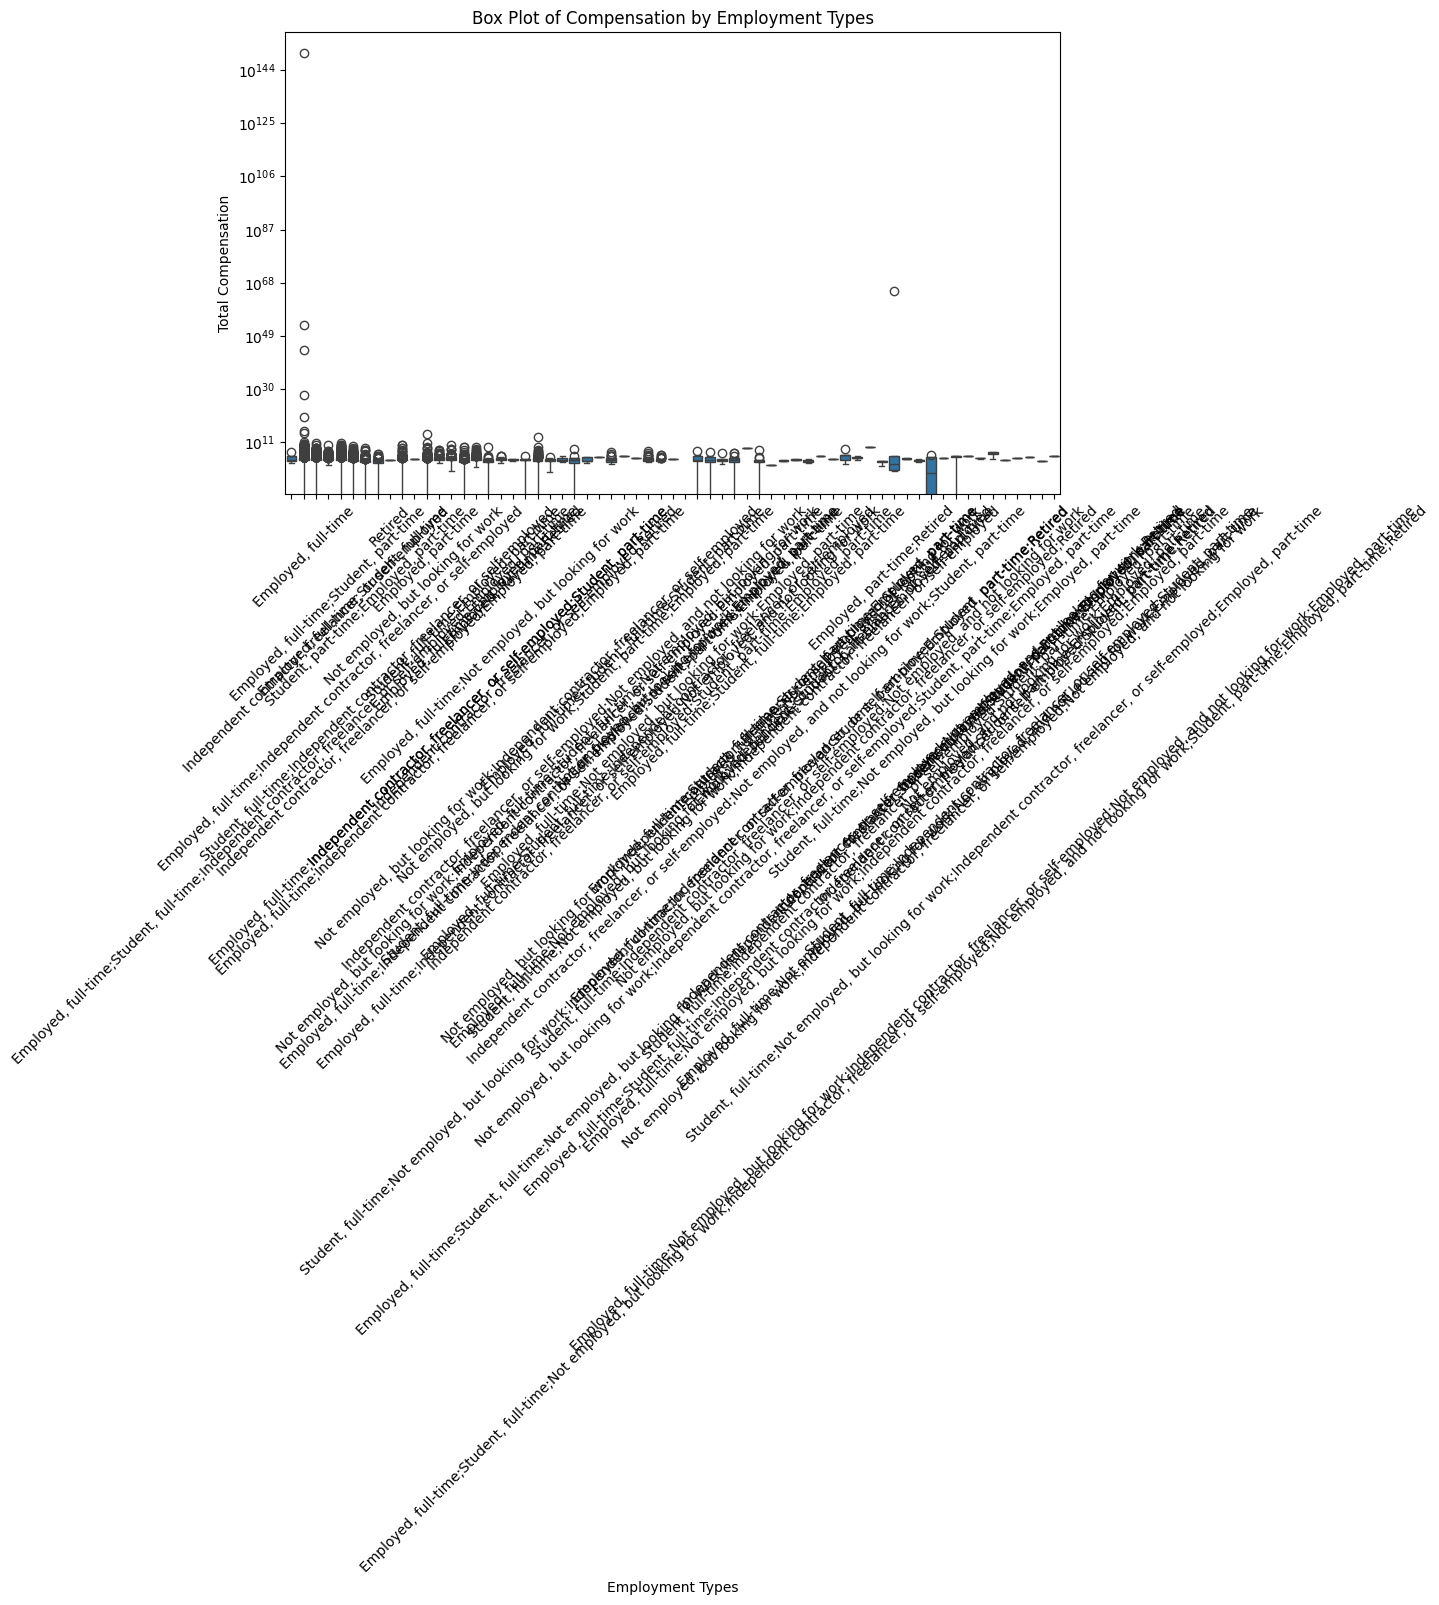

In [23]:
# your code goes here
query = """
SELECT CompTotal, Employment 
FROM main 
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Employment', y='CompTotal')
plt.title('Box Plot of Compensation by Employment Types')
plt.xlabel('Employment Types')
plt.ylabel('Total Compensation')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


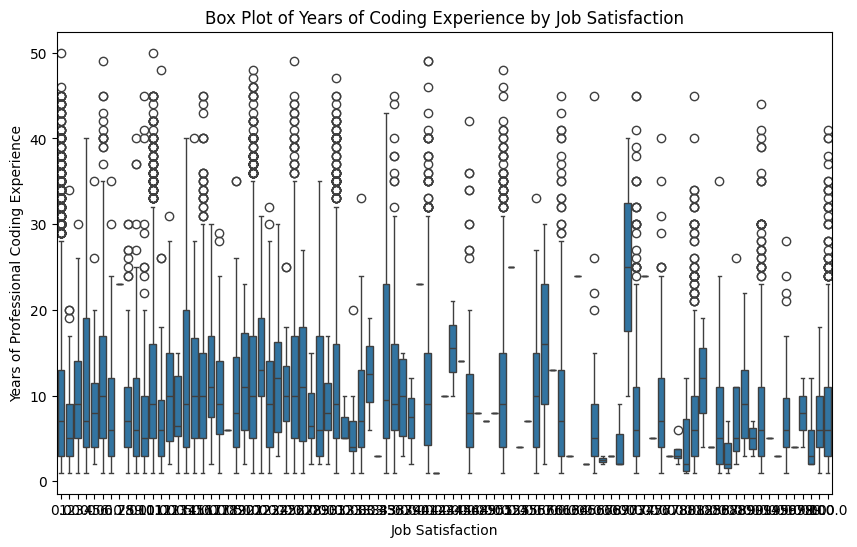

In [24]:
# your code goes here
query = """
SELECT YearsCodePro, JobSatPoints_6 
FROM main 
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatPoints_6', y='YearsCodePro')
plt.title('Box Plot of Years of Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years of Professional Coding Experience')
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
